In [ ]:
# compare sm-PORE-cupine vs DREEM mod rate --- ---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import io as sio 

In [ ]:
## 1. Supp_Figure_5e ---  

In [ ]:
## 1_1. sm-PORE-cupine ADD ---

In [3]:
def get_sizes(f_sizes):
    sizes = {}
    with open(f_sizes, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            sizes[row[0]] = int(row[1])
    return sizes 

def convert_mm_to_df(f_mtx, f_id, p_gene, 
                     f_sizes, p_sep=",", p_threshold_len_prop=0.8):
    """
    Utility function for processing sparse matrix .mtx files
    """

    # load sizes file
    sizes = get_sizes(f_sizes)
    
    
    # load iid file
    if pd.read_csv(f_id, index_col=0, sep=p_sep).shape[1] == 1:
        df_iid = pd.read_csv(f_id, index_col=0, sep=p_sep, names=["iid"])
    else:
        df_iid = pd.read_csv(f_id, index_col=0, sep=p_sep, names=["iid", "length", "start"])
    

    # load sparse matrix
    sm = sio.mmread(f_mtx)

    # determine whether sparse matrix is undersized and remedy if so
    new_row_size = df_iid.shape[0]
    new_column_size = sizes[p_gene]
    if sm.shape[1] < new_column_size:  # resize
        sm.resize((new_row_size, new_column_size))
    elif sm.shape[1] > new_column_size:
        print(sm.shape[1], new_column_size)
        print("shapemap column greater than genome sizes file")
        assert False

    # load sparse matrix as a pandas dataframe
    df_mm = pd.DataFrame.sparse.from_spmatrix(sm)
    df_mm.index = df_iid.iid

    if df_iid.shape[1] >= 2:
        # Threshold by Length
        df_mm = df_mm.loc[df_iid[df_iid.length >= (p_threshold_len_prop * sizes[p_gene])].iid,:]
    
    return df_mm


def load_data(f_mtxs, f_ids, p_genes, f_sizes=None, p_depth=-1, p_length=-1, 
              p_start=None, p_end=None, p_threshold=1,
              p_threshold_len_prop=0.8, p_verbose=True):
    
    """
    Loads SHAPE-MaP or PORE-cupine data based on the input specifications
    Must be able to accept both dense matrix or sparse matrix
    """

    dfs = []
    for f_mtx, f_id, p_gene in zip(f_mtxs, f_ids, p_genes):
        df = convert_mm_to_df(f_mtx, f_id, p_gene,
                            f_sizes=f_sizes,
                            p_threshold_len_prop=p_threshold_len_prop)
        dfs.append(df)
    
    
    if p_length == -1:
        p_start = 0
        p_end = dfs[0].shape[1]
    

    if p_depth == -1:
        p_depth = min([ df.shape[0] for df in dfs ])

    if p_verbose:
        print("%s %s %s" % (p_start, p_end, " ".join(map(str, [ df.shape[0] for df in dfs]))))
        print(p_depth)

    if p_depth is None:
        ndfs =  [ df.iloc[:,p_start:p_end] for df in dfs ]
    else:
        ndfs = [ df.iloc[:p_depth,p_start:p_end] for df in dfs ]
    
    ndf = pd.concat(ndfs, axis=0)

    X = ndf
    X = X.loc[X.sum(axis=1)>=p_threshold,:]
    X = X.fillna(0)

    return X, ndfs

### B. input modification data 

p_genes = ["ADD-TRUNC"]
p_mod = "NAIN3"
p_depth = None
p_length = -1
p_start = None
p_end = None
p_threshold_len_prop = 0.85
p_verbose = True

f_sizes = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/reference_of_ribosxitch_v2.sizes"

### WT ----

f_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/"
f_mtxs = [f_dir + "Noligand/ADD-TRUNC_binary.mtx"]
f_ids =  [ f_dir + "Noligand/ADD-TRUNC_binary.iids.gz"]

X_WT, df_WTs  = load_data(f_mtxs, f_ids, p_genes, f_sizes=f_sizes, 
                                  p_depth=p_depth, p_length=p_length, 
                                  p_start=p_start, p_end=p_end, 
                                  p_threshold_len_prop=p_threshold_len_prop, 
                                  p_verbose=p_verbose)

### MT ----
f_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/"
f_mtxs = [f_dir + "Ligand/ADD-TRUNC_binary.mtx"]
f_ids =  [ f_dir + "Ligand/ADD-TRUNC_binary.iids.gz"]


X_MT, df_MTs  = load_data(f_mtxs, f_ids, p_genes, f_sizes=f_sizes, 
                                  p_depth=p_depth, p_length=p_length, 
                                  p_start=p_start, p_end=p_end, 
                                  p_threshold_len_prop=p_threshold_len_prop, 
                                  p_verbose=p_verbose)

df_WT = pd.concat(df_WTs)
df_MT = pd.concat(df_MTs)
X = pd.concat([X_WT, X_MT])

DTW = df_WT 

0 198 1014188
None
0 198 755881
None


In [ ]:
## 1_2. DREEM ADD--------------

In [4]:
def get_sizes(f_sizes):
    sizes = {}
    with open(f_sizes, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            sizes[row[0]] = int(row[1])
    return sizes 


def convert_mm_to_df(f_mtx, f_id, p_gene, 
                     f_sizes, p_sep=",", p_threshold_len_prop=0.8):
    """
    Utility function for processing sparse matrix .mtx files
    """

    # load sizes file
    sizes = get_sizes(f_sizes)
    
    # load iid file
    if pd.read_csv(f_id, index_col=0, sep=p_sep).shape[1] == 1:
        df_iid = pd.read_csv(f_id, index_col=0, sep=p_sep, names=["iid"])
    else:
        df_iid = pd.read_csv(f_id, index_col=0, sep=p_sep, names=["iid", "length", "start"])
    

    # load sparse matrix
    sm = sio.mmread(f_mtx)

    # determine whether sparse matrix is undersized and remedy if so
    new_row_size = df_iid.shape[0]
    new_column_size = sizes[p_gene]
    if sm.shape[1] < new_column_size:  # resize
        sm.resize((new_row_size, new_column_size))
    elif sm.shape[1] > new_column_size:
        print(sm.shape[1], new_column_size)
        print("shapemap column greater than genome sizes file")
        assert False

    # load sparse matrix as a pandas dataframe
    df_mm = pd.DataFrame.sparse.from_spmatrix(sm)
    df_mm.index = df_iid.iid

    if df_iid.shape[1] >= 2:
        # Threshold by Length
        df_mm = df_mm.loc[df_iid[df_iid.length >= (p_threshold_len_prop * sizes[p_gene])].iid,:]
       
    
    return df_mm


def load_data(f_mtxs, f_ids, p_genes, f_sizes=None, p_depth=-1, p_length=-1, 
              p_start=None, p_end=None, p_threshold=1,
              p_threshold_len_prop=0.8, p_verbose=True):
    
    """
    Loads SHAPE-MaP or PORE-cupine data based on the input specifications
    Must be able to accept both dense matrix or sparse matrix
    """

    dfs = []
    for f_mtx, f_id, p_gene in zip(f_mtxs, f_ids, p_genes):
        df = convert_mm_to_df(f_mtx, f_id, p_gene,
                            f_sizes=f_sizes,
                            p_threshold_len_prop=p_threshold_len_prop)
        dfs.append(df)
    
    
    if p_length == -1:
        p_start = 0
        p_end = dfs[0].shape[1]
    
   

    if p_depth == -1:
        p_depth = min([ df.shape[0] for df in dfs ])

    if p_verbose:
        print("%s %s %s" % (p_start, p_end, " ".join(map(str, [ df.shape[0] for df in dfs]))))
        print(p_depth)

    if p_depth is None:
        ndfs =  [ df.iloc[:,p_start:p_end] for df in dfs ]
    else:
        ndfs = [ df.iloc[:p_depth,p_start:p_end] for df in dfs ]
    
    ndf = pd.concat(ndfs, axis=0)

    X = ndf
    X = X.loc[X.sum(axis=1)>=p_threshold,:]
    X = X.fillna(0)

    return X, ndfs

### B. input modification data 

p_genes = ["ADD-TRUNC"]
p_mod = "NAIN3"
p_depth = None
p_length = -1
p_start = None
p_end = None
p_threshold_len_prop = 0.85
p_verbose = True

f_sizes = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/reference_of_ribosxitch_v2.sizes"

### WT ----
f_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/DMS-MaP/"
f_mtxs = [f_dir + "NOADD_DMS-MaP_DMS_B01_raw.mtx"]
f_ids =  [ f_dir + "NOADD_DMS-MaP_DMS_B01_raw.iids.gz"]

X_WT, df_WTs  = load_data(f_mtxs, f_ids, p_genes, f_sizes=f_sizes, 
                                  p_depth=p_depth, p_length=p_length, 
                                  p_start=p_start, p_end=p_end, 
                                  p_threshold_len_prop=p_threshold_len_prop, 
                                  p_verbose=p_verbose)

### MT ----
f_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/DMS-MaP/"
f_mtxs = [f_dir + "ADD_DMS-MaP_DMS_B01_raw.mtx"]
f_ids =  [f_dir + "ADD_DMS-MaP_DMS_B01_raw.iids.gz"]

X_MT, df_MTs  = load_data(f_mtxs, f_ids, p_genes, f_sizes=f_sizes, 
                                  p_depth=p_depth, p_length=p_length, 
                                  p_start=p_start, p_end=p_end, 
                                  p_threshold_len_prop=p_threshold_len_prop, 
                                  p_verbose=p_verbose)

df_WT = pd.concat(df_WTs)
df_MT = pd.concat(df_MTs)
X = pd.concat([X_WT, X_MT])

dreemco = df_WT


0 198 148814
None
0 198 349789
None


In [5]:
list_of_mr_per_read = []

mr_per_read_mm2 = DTW.sum(axis=1)/DTW.shape[1]
mr_per_read_dtw = dreemco.sum(axis=1)/dreemco.shape[1]


for mr in mr_per_read_mm2:
    nmr = mr+np.random.normal(0, 0.005, 1)[0]
    if nmr < 0.0:
        nmr = 0.0
    list_of_mr_per_read.append(('ADD', "DTW", nmr*100))

for mr in mr_per_read_dtw:
    nmr = mr+np.random.normal(0, 0.005, 1)[0]
    if nmr < 0.0:
        nmr = 0.0
    list_of_mr_per_read.append(('ADD', "DREEM|DRACO", nmr*100))

df_modrate = pd.DataFrame(list_of_mr_per_read, columns=["gene", "category", "modrate"])


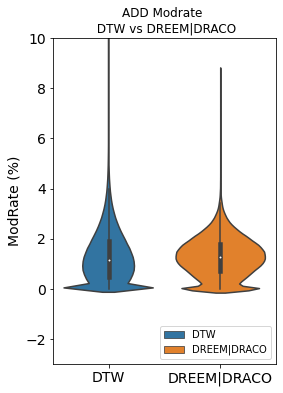

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4,6), sharex=False, sharey=True)
sns.violinplot(y="modrate", x="category", hue="category", data=df_modrate, linewidth=1.5,dodge=False)

ax.set_ylabel("ModRate (%)", fontsize=14)
ax.set_xlabel(None)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(-3, 10)
ax.legend(loc="lower right")
ax.set_title("ADD Modrate \n DTW vs DREEM|DRACO")

dir_out = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/"
plt.savefig(dir_out+'Supp_Figure_5e__ADD_DMS_mod_rate.pdf',bbox_inches='tight', dpi=300) 

In [9]:
mr = df_modrate[(df_modrate.category=="DTW")].modrate.mean()
print(mr)
mr = df_modrate[(df_modrate.category=="DREEM|DRACO")].modrate.mean()
print(mr)

1.2995106304512833
1.284298805749328
